In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [53]:
pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

%matplotlib inline

# Set pandas's max row display
pd.set_option('display.max_row', 1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns', 50)

In [3]:
# Loading the Chicago crime dataset
df = pd.read_csv('/Users/sree/Desktop/Data Viz/Project/dataset/Crimes_-_2001_to_Present.csv')

In [4]:
# To print the first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,False,False,632,6.0,6.0,44.0,08B,1183071.0,1847869.0,2023,11/25/2023 03:41:03 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     12127
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614854
Community Area          613478
FBI Code                     0
X Coordinate             87616
Y Coordinate             87616
Year                         0
Updated On                   0
Latitude                 87616
Longitude                87616
Location                 87616
dtype: int64

In [7]:
len(df)

7950976

# Most Happening Crimes in Chicago

In [8]:
# Checking fof any missing data and null values
df['Primary Type'].isnull().values.any()

False

In [9]:
# No of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1678584
BATTERY                              1451240
CRIMINAL DAMAGE                       906363
NARCOTICS                             750796
ASSAULT                               521746
OTHER OFFENSE                         493268
BURGLARY                              429022
MOTOR VEHICLE THEFT                   393414
DECEPTIVE PRACTICE                    355928
ROBBERY                               299689
CRIMINAL TRESPASS                     217165
WEAPONS VIOLATION                     111932
PROSTITUTION                           69955
OFFENSE INVOLVING CHILDREN             56948
PUBLIC PEACE VIOLATION                 52888
SEX OFFENSE                            31660
CRIM SEXUAL ASSAULT                    27555
INTERFERENCE WITH PUBLIC OFFICER       18741
LIQUOR LAW VIOLATION                   15012
GAMBLING                               14630
ARSON                                  13579
HOMICIDE                               12975
CRIMINAL S

In [10]:
df_crime_type = df['Primary Type'].value_counts(ascending=True)

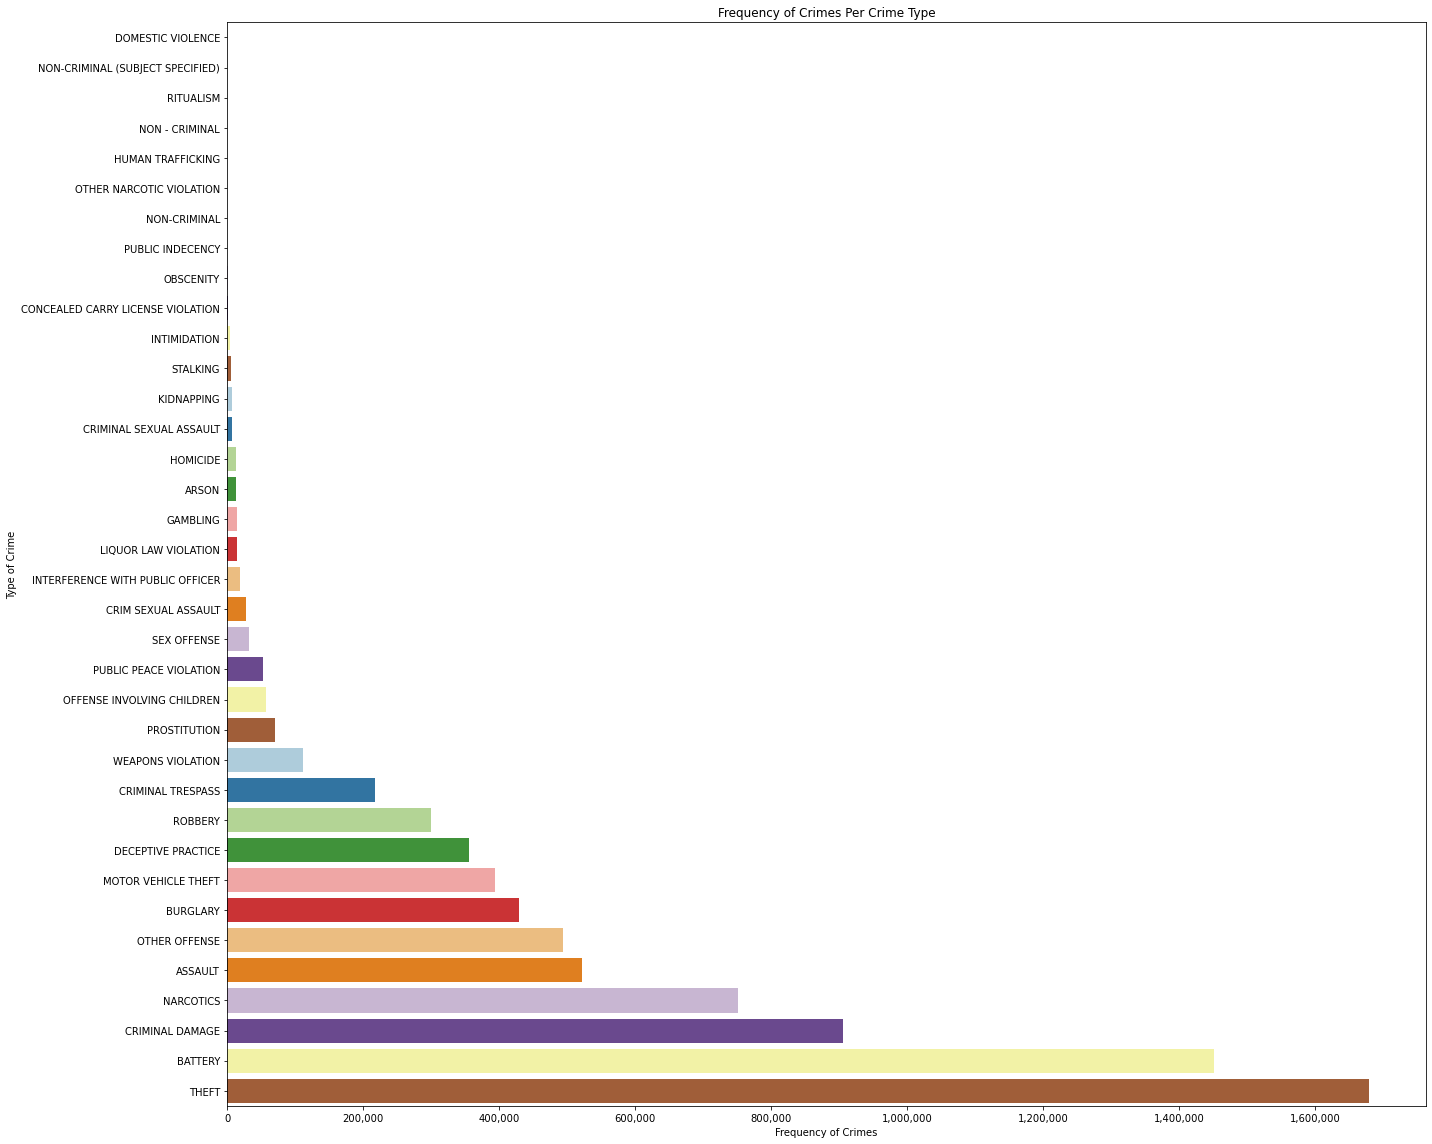

In [49]:
# To visualize the plot
fig=plt.figure(figsize=(20, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
sns.barplot(x=df_crime_type.values, y=df_crime_type.index, palette="Paired")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show() 

# Year Wise Crime Frequency Distribution in Chicago

In [12]:
# Checking fof any missing data and null values
df['Year'].isnull().values.any()

False

In [13]:
# No of reported crimes for each year
df['Year'].value_counts()

2002    486809
2001    485899
2003    475987
2004    469427
2005    453774
2006    448179
2007    437090
2008    427187
2009    392829
2010    370519
2011    351998
2012    336329
2013    307545
2014    275805
2016    269853
2017    269118
2018    268932
2015    264812
2019    261393
2022    239065
2023    237185
2020    212267
2021    208974
Name: Year, dtype: int64

In [14]:
df_crime_year = df['Year'].value_counts(ascending=True)

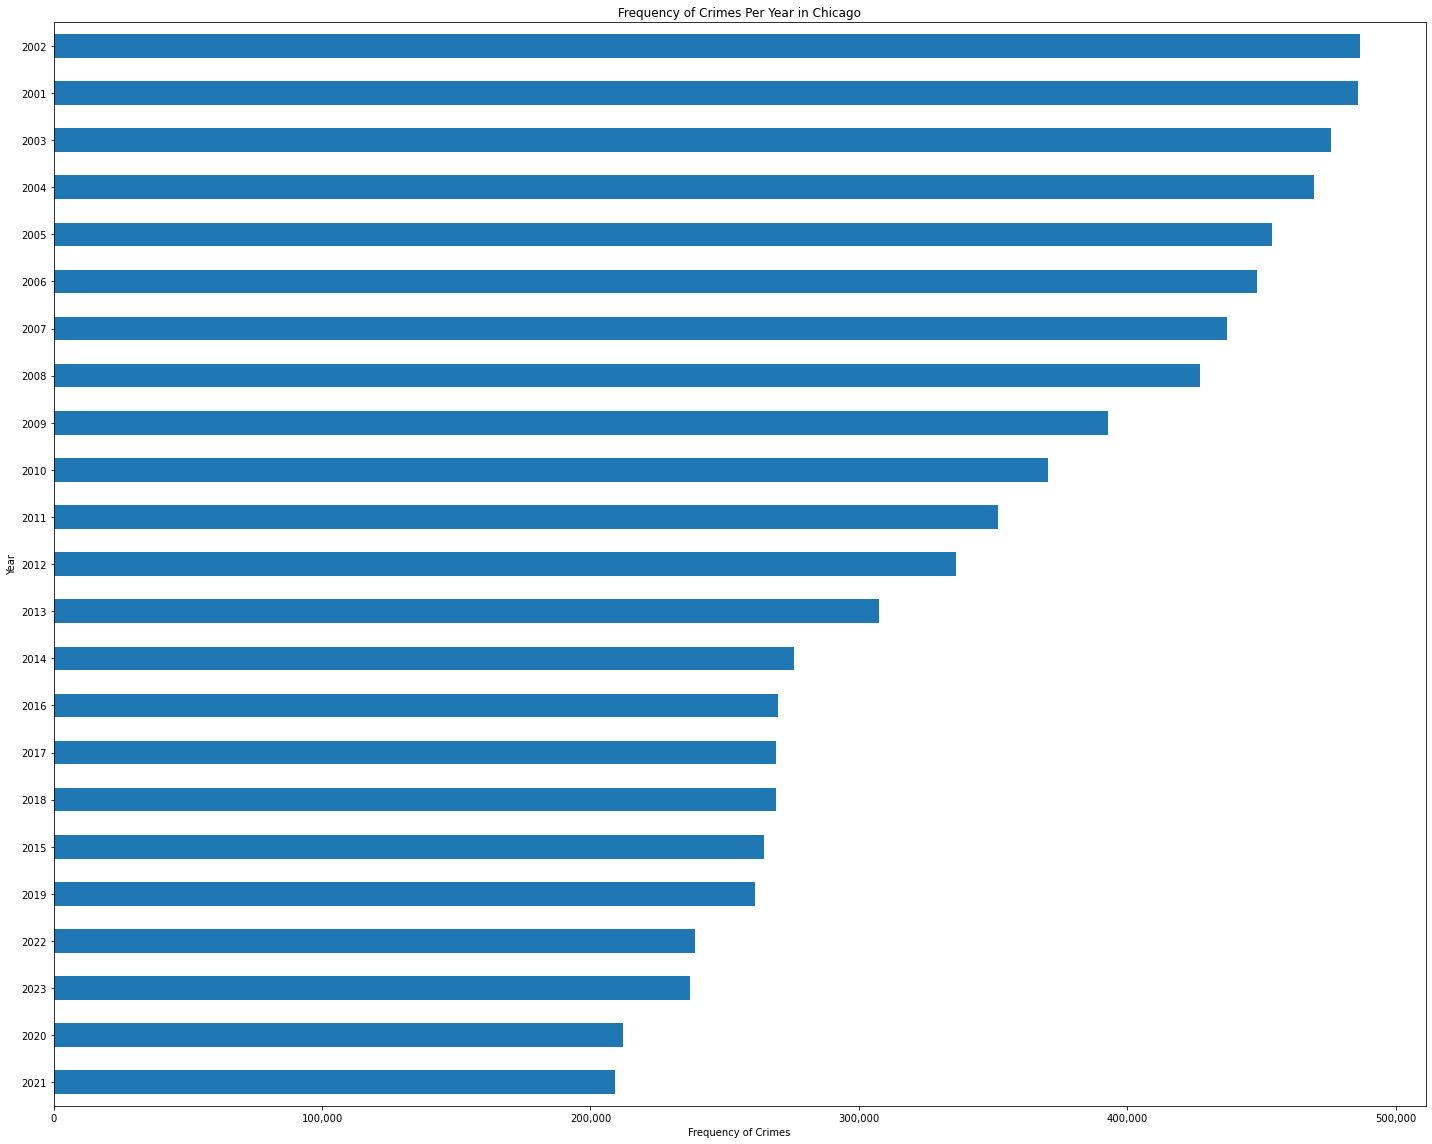

In [36]:
# To visualize the plot
fig=plt.figure(figsize=(20, 16))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = df_crime_year.plot(kind='barh')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

# Most Common Crime Type Year Wise

In [19]:
# Group by Year and Primary Type to get the counts
crime_counts = df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

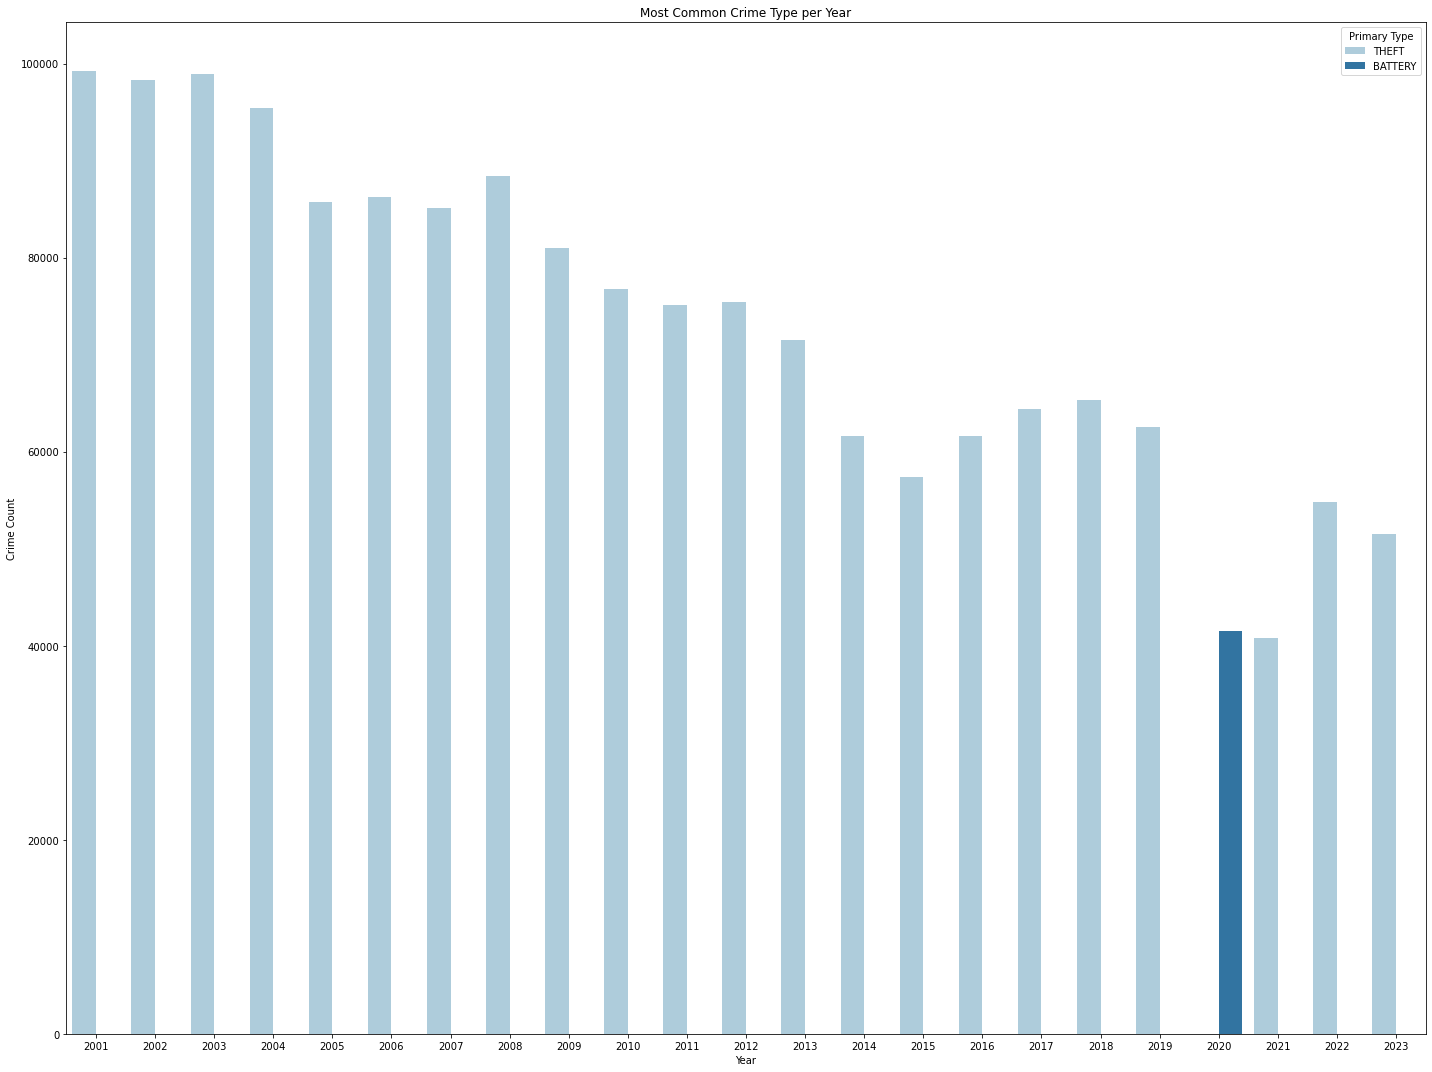

In [48]:
# Find the crime type with the highest count for each year
idx = crime_counts.groupby(['Year'])['Count'].transform(max) == crime_counts['Count']
most_common_crime_per_year = crime_counts[idx]

# Plot the results
plt.figure(figsize=(20,15))
sns.barplot(x='Year', y='Count', hue='Primary Type', data=most_common_crime_per_year, palette='Paired')
plt.title("Most Common Crime Type per Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()

# Least Common Crime Type Year Wise

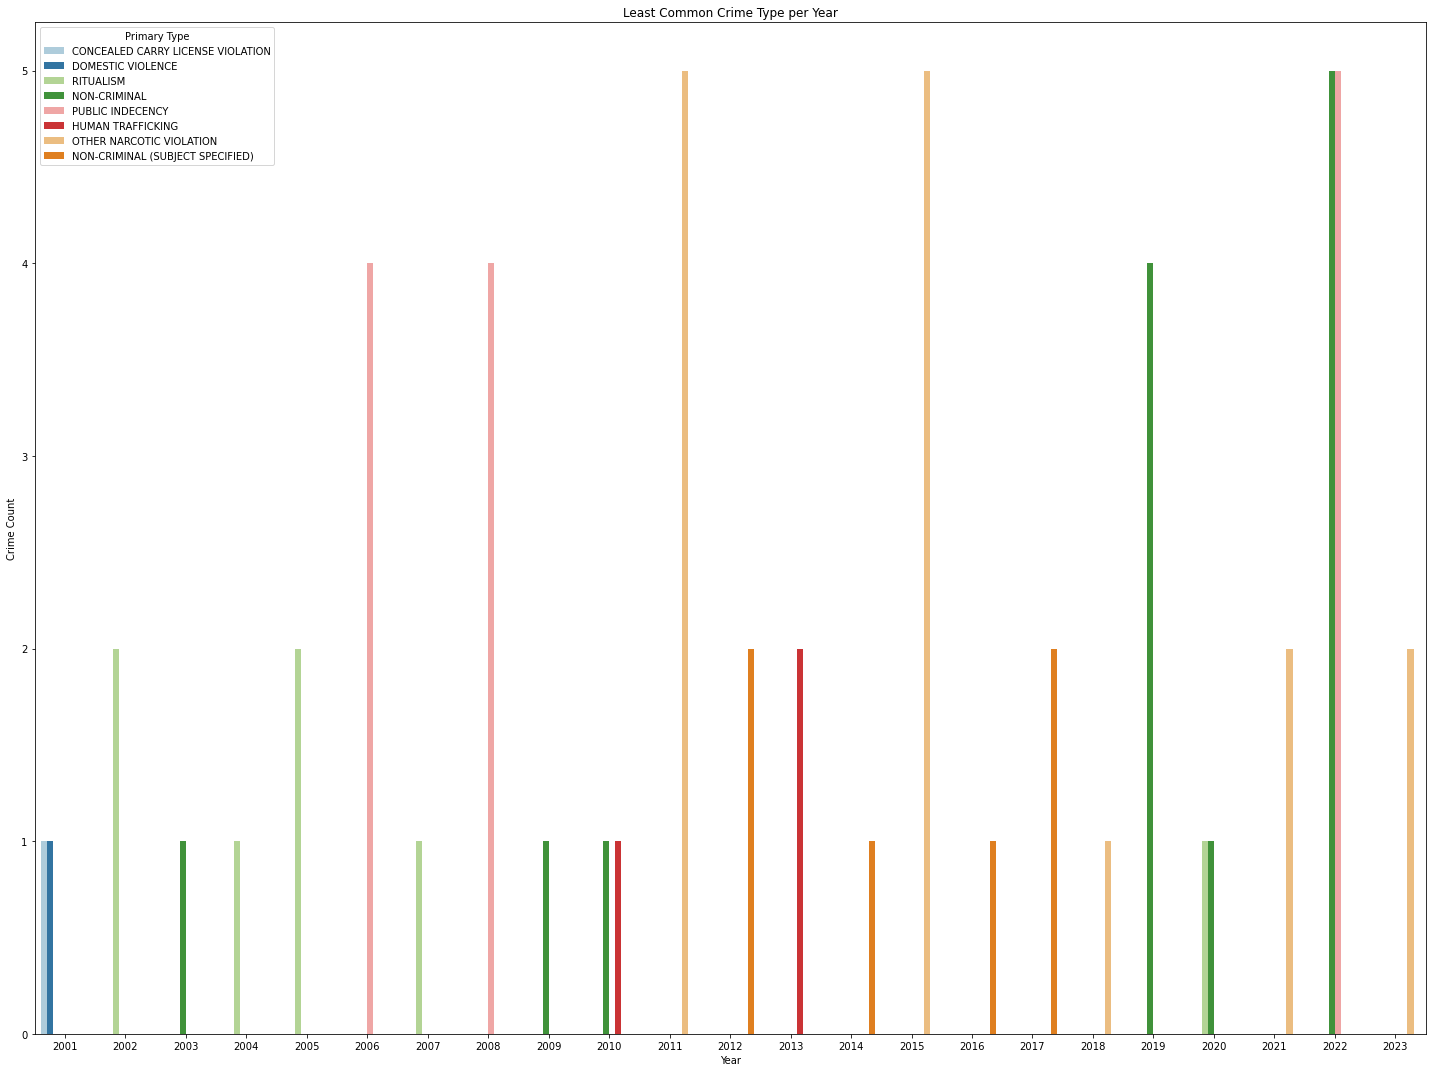

In [47]:
# Find the crime type with the lowest count for each year
idx = crime_counts.groupby(['Year'])['Count'].transform(min) == crime_counts['Count']
least_common_crime_per_year = crime_counts[idx]

# Plot the results with a different color palette
plt.figure(figsize=(20, 15))
sns.barplot(x='Year', y='Count', hue='Primary Type', data=least_common_crime_per_year, palette='Paired')
plt.title("Least Common Crime Type per Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()